<a href="https://colab.research.google.com/github/AmyBeisel/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/132_Intermediate_Linear_Algebra_AMY_BEISEL_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
#sales for the past week
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [0]:
#what is the mean?
total = sum(sales)
mean_sales = total/len(sales)
print('mean of sales from last week:', mean_sales)

mean of sales from last week: 3052.714285714286


In [0]:
#what is the variance?  (distance of each point from the mean)
def subtract_mean(point):
  return point-mean_sales

lambda x: x-mean_sales


<function __main__.<lambda>>

In [0]:
#here is each point from the mean!
distances = list(map(subtract_mean, sales))
distances


[452.2857142857142,
 -652.7142857142858,
 -25.71428571428578,
 -254.71428571428578,
 647.2857142857142,
 197.28571428571422,
 -363.7142857142858]

In [0]:
#now lets square these distances to make them all positive.  
sq_distances = list(map(lambda x : x**2, distances))
sq_distances

[204562.36734693873,
 426035.9387755103,
 661.2244897959217,
 64879.36734693881,
 418978.7959183673,
 38921.65306122446,
 132288.0816326531]

In [0]:
#how long is our list? (Variance is the average squared distance from the mean)
#for a sample 
length_samp = len(sq_distances)-1

#for a whole population (no sample)
length_pop = len(sq_distances)


In [0]:
#calculate variance for sample
variance_sales_1 = sum(sq_distances)/length_samp
print('the variance of the sample: ''{:.2f}'.format(variance_sales_1))

#calculate variance for population
variance_sales_0= sum(sq_distances)/length_pop
print('the variance of the population: ''{:.2f}'.format(variance_sales_0))

the variance of the sample: 214387.90
the variance of the population: 183761.06


In [0]:
#standard deviation (square root of the variance)
#this puts our measures back into the same units as the mean. (example = sales in dollars - STD in dollars)
#Standard Dev is the average distance from the mean.


#needed to import math (or a library) to do this.  NOT FOLLOWING ASSIGNMENT
import math 
print('STD of the sample: ''{:.2f}'.format(math.sqrt(variance_sales_1)))
print('STD of the population: ''{:.2f}'.format(math.sqrt(variance_sales_0)))

STD of the sample: 463.02
STD of the population: 428.67


In [0]:
#Taking a step further and checking my work using numpy and pandas
import numpy as np
import pandas as pd

In [0]:
#NUMPY - variance takes the POPULATION by default
print('the mean: ','{:.2f}'.format(np.mean(sales)))
print('the population variance: ', '{:.2f}'.format(np.var(sales)))
print('the STD of the mean: ', '{:.2f}'.format(np.std(sales)))


the mean:  3052.71
the population variance:  183761.06
the STD of the mean:  428.67


In [0]:
#PANDAS - 
df = pd.DataFrame({"sales": sales})
print('mean:', '{:.2f}'.format(df['sales'].mean()))

mean: 3052.71


In [0]:
# Pandas Variance takes the SAMPLE by default
print('sample variance:', '{:.2f}'.format(df['sales'].var()))

sample variance: 214387.90


In [0]:
#to get the population variance need to do degrees of freedom 0.  
print('population variance:', '{:.2f}'.format(df["sales"].var(ddof=0)))

population variance: 183761.06


In [0]:
#STD - this is the STD of the sample! 
print('sample STD: ', '{:.2f}'.format(df['sales'].std()))

sample STD:  463.02


In [0]:
#STD for the population
print('population STD: ', '{:.2f}'.format(df['sales'].std(ddof = 0)))

population STD:  428.67


In [0]:
#ALL in one spot using pandas
print('mean:', '{:.2f}'.format(df['sales'].mean()))
print('sample variance:', '{:.2f}'.format(df['sales'].var()))
print('population variance:', '{:.2f}'.format(df["sales"].var(ddof=0)))
print('sample STD: ', '{:.2f}'.format(df['sales'].std()))
print('population STD: ', '{:.2f}'.format(df['sales'].std(ddof = 0)))

mean: 3052.71
sample variance: 214387.90
population variance: 183761.06
sample STD:  463.02
population STD:  428.67


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
#make a list of the customers that entered the store last week
customers = [127, 80, 105, 92, 120, 115, 93]

In [0]:
#find the covariance using Numpy
np.cov(sales, customers)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

In [0]:
np.cov(sales, customers)[0][1]

7604.357142857142

In [0]:
#find the covriance using Pandas
#here is the data frame from above
df

,sales
0,3505
1,2400
2,3027
3,2798
4,3700
5,3250
6,2689


In [0]:
#need to add customers to our data frame now!
df['customers'] = pd.Series(customers)
df

,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [0]:
#find the covariance
df.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


In [0]:
df.cov().values[0][1]

7604.357142857142

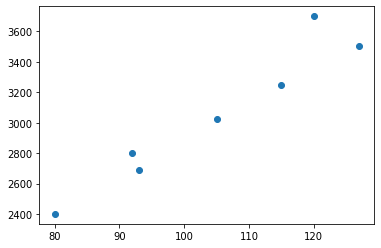

In [0]:
import matplotlib.pyplot as plt
#So, because this is positive covariance, we can say that as the customers tend to go up, the sales also go up. STRONG RELATIONSHIP.
plt.scatter(customers, sales);

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
#Correlation coefficient - divide our covariance values by the product of the std of the two variables.  
#fixed range from -1 to 1 with 0 representing no linear relationship between data.
#compare relationships - how strong the relationship is between two variables. 
#Correlation does not have units. Covariance always has units
#Correlation isn't affected by the changes in the center (i.e mean) or scale of the variables


In [0]:
#calculate the STD of both lists using pandas
std_s = df['sales'].std(ddof=1)
std_c = df['customers'].std(ddof=1)
print(std_s, '\n', std_c)

463.0204150595357 
 17.057326313123664


In [0]:
#Calcuate covariance using pandas
cov_sc = df['sales'].cov(df['customers'])
print('{:.2f}'.format(cov_sc))

7604.36


In [0]:
#calucate the demonator
demon = std_s * std_c
demon

7897.890309308459

In [0]:
#caulcate the correlation
corr_sc = cov_sc/demon
print('{:.2f}'.format(corr_sc))


0.96


In [0]:
#all above by hand, lets check the work and do it all in one blow using panda function
print('correlation coefficient: ', df['sales'].corr(df['customers']))

correlation coefficient:  0.9628339778148909


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
df = pd.read_csv(url)
print(df.shape)
df.sample(7)

(1310, 16)


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
732,733,3.0,0.0,"Corn, Mr. Harry",male,30.0,0.0,0.0,SOTON/OQ 392090,8.0500,NaN,S,NaN,NaN,London,0
240,241,1.0,1.0,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0,0.0,0.0,111428,26.5500,NaN,S,9,NaN,"New York, NY",0
33,34,1.0,1.0,"Bonnell, Miss. Elizabeth",female,58.0,0.0,0.0,113783,26.5500,C103,S,8,NaN,"Birkdale, England Cleveland, Ohio",1
195,196,1.0,1.0,"Maioni, Miss. Roberta",female,16.0,0.0,0.0,110152,86.5000,B79,S,8,NaN,NaN,1
1140,1141,3.0,0.0,"Reynolds, Mr. Harold J",male,21.0,0.0,0.0,342684,8.0500,NaN,S,NaN,NaN,NaN,0
1261,1262,3.0,1.0,"Turkula, Mrs. (Hedwig)",female,63.0,0.0,0.0,4134,9.5875,NaN,S,15,NaN,NaN,0
696,697,3.0,0.0,"Cacic, Miss. Manda",female,21.0,0.0,0.0,315087,8.6625,NaN,S,NaN,NaN,NaN,0


In [0]:
#only need numeric columns from the dataset.
df.dtypes

Unnamed: 0            int64
pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [0]:
#make a new data frame with only numberic columns
numeric_df = df._get_numeric_data()
numeric_df.head()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
0,1,1.0,1.0,29.0000,0.0,0.0,211.3375,NaN,1
1,2,1.0,1.0,0.9167,1.0,2.0,151.5500,NaN,1
2,3,1.0,0.0,2.0000,1.0,2.0,151.5500,NaN,1
3,4,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0,1
4,5,1.0,0.0,25.0000,1.0,2.0,151.5500,NaN,1


In [0]:
#calculate the covarianve for the numeric columns of the data set
numeric_df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [0]:
#calculate the correaltion for the numeric columns of the data set.
numeric_df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
#synonym of orthogonal is 'perpendicularity'
#if the dot product is 0, then the vectors are orthogonal.  
vector_1 = np.array([2,2])
vector_2 = np.array([1,-1])


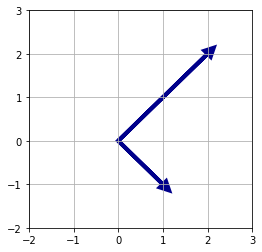

In [0]:
#set up the figure
fig, ax = plt.subplots(figsize = (4,4))
ax.grid()
plt.xlim(-2, 3)
plt.ylim(-2,3)

#plot the vectors
for vect in [vector_1, vector_2 ]:
  plt.arrow(0,0,
            vect[0],
            vect[1],
          head_width = .2,
          head_length = .2,
          linewidth = 4,
          color = 'darkblue')


## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
#These vectors are not orthogonal because the dot product is ! = 0. (not equal to 0)
a = np.array([-5, 3,7])
b = np.array([6, -8, 2])
np.dot(a,b)

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([2, -15, 6, 20])

array([  2, -15,   6,  20])

In [0]:
c**2

array([  4, 225,  36, 400])

In [0]:
c*c

array([  4, 225,  36, 400])

In [0]:
c.T*c

array([  4, 225,  36, 400])

In [0]:
# THEY ARE ALL THE SAME!!!!

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here 

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
#lets get the array
f = np.array ([4, 12, 11, 9,2])
f

array([ 4, 12, 11,  9,  2])

In [0]:
#how long is it?
norm_f = np.linalg.norm(f)
norm_f

19.131126469708992

In [0]:
#find its unit vector
#take orginal vetor, and dividing it by its own length, produce a new vector. 
f_hat = f/np.linalg.norm(f)
f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

In [0]:
#how long is this?
#its length will be one. 
f_hat_norm = np.linalg.norm(f_hat)
f_hat_norm

0.9999999999999999

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [0]:
vector_1 = np.array([-.8, 1.3])
vector_2 = np.multiply(vector_1, 2)

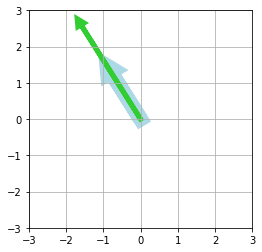

In [0]:
#plot lineraly dependent vectors
fig, ax = plt.subplots(figsize = (4,4))
ax.grid()
plt.xlim(-3, 3)
plt.ylim(-3,3)

for myvect, mycolor, mywidth  in [(vector_1, 'lightblue', 15),
                                 (vector_2, 'limegreen', 5)]:
  plt.arrow(0,0,
            myvect[0],
            myvect[1],
            head_width = .2,
            head_length = .2,
            linewidth = mywidth,
            color = mycolor)

In [0]:
#plot linerally independent vectors
vector_1 = np.random.randint(low = -3, high = 3, size = 2)
vector_2 = np.random.randint(low = -3, high = 3, size = 2)

print(vector_1, '\n', vector_2)

[-3  2] 
 [-3 -1]


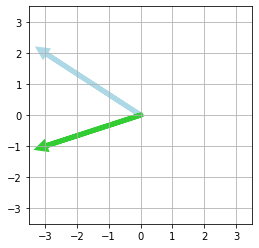

In [0]:
fig, ax = plt.subplots(figsize = (4,4))
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)
ax.grid()


for myvect, mycolor, mywidth  in [(vector_1, 'lightblue', 5),
                                 (vector_2, 'limegreen', 5)]:
  plt.arrow(0,0,
            myvect[0],
            myvect[1],
            head_width = .2,
            head_length = .2,
            linewidth = mywidth,
            color = mycolor)

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

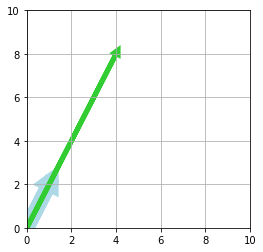

In [0]:
g = np.array([1,2])
h = np.array([4,8])

fig, ax = plt.subplots(figsize = (4,4))
ax.grid()
plt.xlim(0, 10)
plt.ylim(0,10)


for myvect, mycolor, mywidth  in [(g, 'lightblue', 15),
                                 (h, 'limegreen', 5)]:
  plt.arrow(0,0,
            myvect[0],
            myvect[1],
            head_width = .2,
            head_length = .2,
            linewidth = mywidth,
            color = mycolor)


In [0]:
#these are linear dependent!  so span can only be on a line.


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
l = np.array([1,2,3])
m = np.array([-1, 0, 7])
n = np.array([4,8,2 ])

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



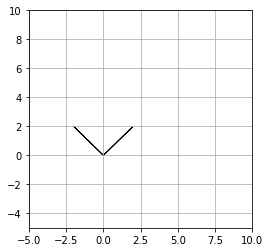

In [232]:
vector_1 = np.array([-2, 2])
vector_2 = np.array([2,2])

fig, ax = plt.subplots(figsize = (4,4))
ax.grid()
plt.xlim(-5, 10)
plt.ylim(-5,10)

#display
plt.arrow(0,0, vector_1[0], vector_1[1])
plt.arrow(0,0, vector_2[0], vector_2[1]);


## 6.2 What does it mean to form a basis?

In 2-dimensional space  ℝ2 , ANY vector (a,b) can be decomposed as the linear combination of the basis vectors (1,0) and (0,1). Since these are unit vectors, they are called "orthonormal basis".

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [233]:
P = np.array([[1,2,3],[-1, 0, 7], [4,8,2]])
P

array([[ 1,  2,  3],
       [-1,  0,  7],
       [ 4,  8,  2]])

In [234]:
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

The dimension of the vector space spanned by its columns.  

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

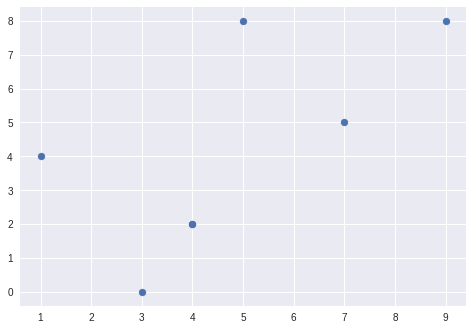

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()